In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
student_df = pd.read_csv("./data/student.csv", sep=';')
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
student_df.drop(["reason", "guardian", "activities", "nursery"], axis=1, inplace = True)
student_df = student_df.filter([
    'Medu', 'Fedu', 'internet', 'schoolsup', 'studytime', 
    'famrel', 'freetime', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'])
student_df

,Medu,Fedu,internet,schoolsup,studytime,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3
0,4,4,no,yes,2,4,3,1,1,3,6,5,6,6
1,1,1,yes,no,2,5,3,1,1,3,4,5,5,6
2,1,1,yes,yes,2,4,3,2,3,3,10,7,8,10
3,4,2,yes,no,3,3,2,1,1,5,2,15,14,15
4,3,3,no,no,2,4,3,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,no,no,2,5,5,4,5,4,11,9,9,9
391,3,1,yes,no,1,2,4,3,4,2,3,14,16,16
392,1,1,no,no,1,5,5,3,3,3,3,10,8,7
393,3,2,yes,no,1,4,4,3,4,5,0,11,12,10


In [5]:
student_df.loc[student_df["internet"] == "yes" ,"internet"] = 1
student_df.loc[student_df["internet"] == "no" ,"internet"] = 0
student_df["schoolsup"] = pd.DataFrame(LabelBinarizer().fit_transform(student_df["schoolsup"]))
student_df

,Medu,Fedu,internet,schoolsup,studytime,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3
0,4,4,0,1,2,4,3,1,1,3,6,5,6,6
1,1,1,1,0,2,5,3,1,1,3,4,5,5,6
2,1,1,1,1,2,4,3,2,3,3,10,7,8,10
3,4,2,1,0,3,3,2,1,1,5,2,15,14,15
4,3,3,0,0,2,4,3,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,0,0,2,5,5,4,5,4,11,9,9,9
391,3,1,1,0,1,2,4,3,4,2,3,14,16,16
392,1,1,0,0,1,5,5,3,3,3,3,10,8,7
393,3,2,1,0,1,4,4,3,4,5,0,11,12,10


In [6]:
train, test = train_test_split(student_df, test_size=0.2)
train

,Medu,Fedu,internet,schoolsup,studytime,famrel,freetime,Dalc,Walc,health,absences,G1,G2,G3
294,3,2,1,0,3,5,4,1,1,4,8,14,13,14
47,4,3,1,0,4,4,2,1,1,2,4,19,19,20
328,4,4,1,0,3,5,4,1,3,4,7,10,9,9
74,3,3,1,1,2,4,3,2,4,5,54,11,12,11
323,3,1,1,0,3,3,4,2,3,5,1,12,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,4,2,1,0,2,4,5,1,3,5,2,15,15,16
281,3,2,1,0,1,4,4,3,4,3,19,11,9,10
355,3,3,0,0,2,5,3,1,1,5,0,10,9,9
189,1,2,0,0,2,3,1,1,5,3,4,8,9,10


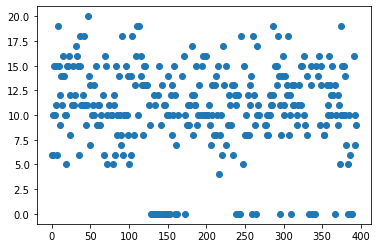

In [7]:
plt.scatter(train.index, train["G3"])

In [8]:
X = train.drop(["G3"], axis=1, inplace = False)
Y = train["G3"]
regression = LinearRegression().fit(X, Y)
regression.coef_

array([ 0.16009423, -0.15744789, -0.35100266,  0.77969403, -0.13243273,
        0.32898837,  0.06026001, -0.19618027,  0.1757983 ,  0.07663565,
        0.03033461,  0.18580966,  0.97959796])

In [9]:
X_test = test.drop(["G3"], axis=1, inplace = False)
Y_test = test["G3"]
prediction = regression.predict(X_test)
print("R2 score: ", r2_score(Y_test, prediction))
print("MSE : ", mean_squared_error(Y_test, prediction))
pd.DataFrame({ 'Test': Y_test, 'Predicted': prediction.flatten() })

R2 score:  0.8111764734264986
MSE :  3.886841982349717


,Test,Predicted
86,6,6.289907
165,12,11.552801
105,11,11.256873
125,12,13.668582
177,6,4.115603
...,...,...
269,0,-1.177156
59,16,16.309321
325,11,10.745684
39,13,14.140019


In [10]:
regression.score(X_test, Y_test)

0.8111764734264986